# Drawing the multipanel barplot for WBGT: all AR6 land regions

In [1]:
ensembles = c('CORDEX', 'CMIP5', 'CMIP6')
GWLs = c('1.5','2','4')
scenarios = c('modern', '2.6_mid', '8.5_mid', '2.6_late', '8.5_late')

data = list()
for (ensemble in ensembles){
    data[[ensemble]] = list()
    for (GWL in GWLs){
        data[[ensemble]][[GWL]] = list()
    }
    for (scenario in scenarios){
        data[[ensemble]][[scenario]] = list()
    }

}

In [2]:
mask = 'mask14'

## 1. Get the data from the json files

In [3]:
library(rjson)

Warning message:
“package ‘rjson’ was built under R version 3.6.3”


### Prepare R list with all the regions => Get the regions list from the CMIP6 json file, for GWL 1.5K

In [4]:
# -- List of regions for AFRICA
continent_regions = c('NWN','NEN','WNA','CNA','ENA','NCA')

regions_by_continent = list(
    NAM = c('NWN','NEN','WNA','CNA','ENA','NCA')
    )


all_regions = list()
GWLs = c('1.5','2','4')
scenarios = c('modern', '2.6_mid', '8.5_mid', '2.6_late', '8.5_late')

for (region_name in continent_regions){
    all_regions[[region_name]] = list()
    for (ensemble in c('CMIP6','CMIP5','CORDEX')){
        all_regions[[region_name]][[ensemble]] = list()
        for (GWL in GWLs){
            all_regions[[region_name]][[ensemble]][[GWL]] = list()
        }#end for GWL
        for (scenario in scenarios){
            all_regions[[region_name]][[ensemble]][[scenario]] = list()
        }#end for scenario
    }#end for ensemble
}#end for region_name


### Read in CMIP6 data

In [5]:
clim_periods = c('modern', '2.6_mid', '8.5_mid', '2.6_late', '8.5_late', '1.5','2','4')

ensemble = 'CMIP6'
json_file = paste('/home/jservon/Chapter12_IPCC/data/snw/',ensemble,'_NORTH-AMERICA_snw_',mask,'_AR6_regional_averages.json',sep='')
json_data <- fromJSON(paste(readLines(json_file), collapse=""))

for (clim_period in names(json_data)){
    if (clim_period=='85_1995_2014'){ wclim_period='modern' }
    if (clim_period=='85_2041_2060'){ wclim_period='8.5_mid' }
    if (clim_period=='85_2081_2099'){ wclim_period='8.5_late' }
    if (clim_period=='26_2041_2060'){ wclim_period='2.6_mid' }
    if (clim_period=='26_2081_2099'){ wclim_period='2.6_late' }
    if (clim_period=='1.5'){ wclim_period='1.5' }
    if (clim_period=='2'){ wclim_period='2' }
    if (clim_period=='3'){ wclim_period='3' }
    if (clim_period=='4'){ wclim_period='4' }
    for (region_name in names(json_data[[clim_period]])){
        if (json_data[[clim_period]][[region_name]][1] == -99999){
            vals = c(NA,NA,NA)
        }else{
            vals = json_data[[clim_period]][[region_name]]
        }
        all_regions[[region_name]][[ensemble]][[wclim_period]][['vals']] = vals
    }
}

Warning message in readLines(json_file):
“ligne finale incomplète trouvée dans '/home/jservon/Chapter12_IPCC/data/snw/CMIP6_NORTH-AMERICA_snw_mask14_AR6_regional_averages.json'”


In [6]:
all_regions[['CNA']][['CMIP6']][['modern']][['vals']]
#json_data[['85_1995_2014']][['CNA']][1]

[1] 16.59915 21.05012 27.02954

### Read in CMIP5 data

In [7]:
clim_periods = c('modern', '2.6_mid', '8.5_mid', '2.6_late', '8.5_late', '1.5','2','4')

ensemble = 'CMIP5'
json_file = paste('/home/jservon/Chapter12_IPCC/data/snw/',ensemble,'_NORTH-AMERICA_snw_',mask,'_AR6_regional_averages.json',sep='')
json_data <- fromJSON(paste(readLines(json_file), collapse=""))

for (clim_period in names(json_data)){
    if (clim_period=='85_1995_2014'){ wclim_period='modern' }
    if (clim_period=='85_2041_2060'){ wclim_period='8.5_mid' }
    if (clim_period=='85_2081_2099'){ wclim_period='8.5_late' }
    if (clim_period=='26_2041_2060'){ wclim_period='2.6_mid' }
    if (clim_period=='26_2081_2099'){ wclim_period='2.6_late' }
    if (clim_period=='1.5'){ wclim_period='1.5' }
    if (clim_period=='2'){ wclim_period='2' }
    if (clim_period=='3'){ wclim_period='3' }
    if (clim_period=='4'){ wclim_period='4' }
    for (region_name in names(json_data[[clim_period]])){
        if (json_data[[clim_period]][[region_name]][1] == -99999){
            vals = c(NA,NA,NA)
        }else{
            vals = json_data[[clim_period]][[region_name]]
        }
        all_regions[[region_name]][[ensemble]][[wclim_period]][['vals']] = vals
    }
}

Warning message in readLines(json_file):
“ligne finale incomplète trouvée dans '/home/jservon/Chapter12_IPCC/data/snw/CMIP5_NORTH-AMERICA_snw_mask14_AR6_regional_averages.json'”


In [8]:
all_regions[['CNA']][['CMIP5']][['modern']][['vals']]


[1] 17.49768 25.34061 33.92318

In [9]:
names(json_data)

[1] "1.5"          "2"            "26_2041_2060" "26_2081_2099" "3"           
[6] "4"            "85_1995_2014" "85_2041_2060" "85_2081_2099"

### Read in CORDEX data

In [10]:
ensemble = 'CORDEX'
wensemble = paste('NAM-22_',ensemble,sep='')
json_file = paste('/home/jservon/Chapter12_IPCC/data/snw/',wensemble,'_NORTH-AMERICA_snw_',mask,'_AR6_regional_averages.json',sep='')
json_data <- fromJSON(paste(readLines(json_file), collapse=""))

for (clim_period in names(json_data)){
    if (clim_period=='85_1995_2014'){ wclim_period='modern' }
    if (clim_period=='85_2041_2060'){ wclim_period='8.5_mid' }
    if (clim_period=='85_2081_209*'){ wclim_period='8.5_late' }
    if (clim_period=='26_2041_2060'){ wclim_period='2.6_mid' }
    if (clim_period=='26_2081_209*'){ wclim_period='2.6_late' }
    if (clim_period=='1.5'){ wclim_period='1.5' }
    if (clim_period=='2'){ wclim_period='2' }
    if (clim_period=='3'){ wclim_period='3' }
    if (clim_period=='4'){ wclim_period='4' }
    for (region_name in names(json_data[[clim_period]])){
        if (json_data[[clim_period]][[region_name]][1] == -99999){
            vals = c(NA,NA,NA)
        }else{
            all_regions[[region_name]][[ensemble]][[wclim_period]][['vals']] = json_data[[clim_period]][[region_name]]
        }
    }
}

Warning message in readLines(json_file):
“ligne finale incomplète trouvée dans '/home/jservon/Chapter12_IPCC/data/snw/NAM-22_CORDEX_NORTH-AMERICA_snw_mask14_AR6_regional_averages.json'”


## Attribute the colors

In [11]:
for (region_name in continent_regions){
    ensemble = 'CMIP6'
    all_regions[[region_name]][[ensemble]][['modern']][['color']] = 'black'
    all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue4'
    all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'red'
    all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue4'
    all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'red'
    all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'darkorchid4'
    all_regions[[region_name]][[ensemble]][['2']][['color']] = 'darkorange'
    all_regions[[region_name]][[ensemble]][['4']][['color']] = 'tan4'

    ensemble = 'CMIP5'
    all_regions[[region_name]][[ensemble]][['modern']][['color']] = 'grey40'
    all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue3'
    all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'lightcoral'
    all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue3'
    all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'lightcoral'
    all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'darkorchid3'
    all_regions[[region_name]][[ensemble]][['2']][['color']] = 'sandybrown'
    all_regions[[region_name]][[ensemble]][['4']][['color']] = 'peachpuff4'

    ensemble = 'CORDEX'
    all_regions[[region_name]][[ensemble]][['modern']][['color']] = 'grey60'
    all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue'
    all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'lightpink'
    all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue'
    all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'lightpink'
    all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'mediumpurple1'
    all_regions[[region_name]][[ensemble]][['2']][['color']] = 'navajowhite2'
    all_regions[[region_name]][[ensemble]][['4']][['color']] = 'peachpuff3'
}#end for region_name

In [31]:
"barplot_satellite_chap12"=function(data, title, ylabel, do_ylab='TRUE', do_xlab='TRUE', mar=c(4,3,2.5,1)){
    #
    # -- Names
    ensembles = c('CORDEX', 'CMIP5', 'CMIP6')
    GWLs = c('1.5','2','4')
    scenarios = c('modern', '2.6_mid', '8.5_mid', '2.6_late', '8.5_late')
    nhorizons = length(GWLs)+length(scenarios)
    
    # -- Y limits
    ylim = c(0,100)
    
    # -- position on the x axis of the ensembles
    xpos = c(1,2,3, 4.5, 6, 7, 8, 9)
    xvert = c(1.5,2.5,3.5,5.5,7.5)
    inner_margin = 0.5
    xlim = c(1-inner_margin, max(xpos)+inner_margin)
    general_cex=1.3
    par(cex=general_cex+0.3)
    par(mar=mar)
    plot(1:nhorizons, rep(NA, nhorizons), col='white', ylim=ylim, xlim=xlim,
         xaxt='n', yaxt='n', xlab='', ylab='', xaxs="i", font=2)#
    par(cex=general_cex)
    mtext(ylabel, 2, font=2, line=2.2, cex=general_cex)
    #     cex.axis=1.2, cex.lab=1.5, font=2)
    par(xpd=NA)
    par(font=2)
    
    for (yval in seq(0,100,by=20)){
        lines(xlim,rep(yval,2),type='l', lty=2)
    }

    delta = 0.22 # - space between CMIP6/CMIP5/CORDEX
    # -- Plot data
    i = 1
    for (horizon in c(GWLs, scenarios)){
        j = xpos[i] - delta
        for (ensemble in ensembles){
            print(paste(horizon, ensemble))
            dat = data[[ensemble]][[horizon]][['vals']]
            if (is.null(dat)){dat = c(NA,NA,NA)}
            col = data[[ensemble]][[horizon]][['color']]
            lines(rep(j,2), c(dat[1],dat[3]), type='l', col=col, lwd=4)
            points(j, dat[2], cex=1.5, pch=16, col=col)
            j = j + delta
        }
        i = i + 1
    }
    
    # -- Y axis
    par(cex=2.5)
    yvals = seq(0,100, by=20)
    ylabels = yvals
    dumyvals = yvals
    if (do_ylab=='TRUE'){
        par(cex=3)
        axis(2, at=dumyvals, labels=ylabels, las=1)
        par(cex=general_cex)
    }else{
        axis(2, at=dumyvals, labels=FALSE)
    }
    par(cex=general_cex)
    
    
    # -- X axis
    if (do_xlab=='FALSE'){
        axis(1, at=xvert, labels=rep('',length(xvert)))
    }
    # -- Title
    mtext(title,3, font=2, cex=3, line=0.5)
    
    # -- Vertical lines    
    vline = ylim
    vline[1] = ylim[1] - (ylim[2]-ylim[1])*0.3
    if (do_xlab=='TRUE'){
        for (v in xvert){lines(c(v,v),vline,type='l', lwd=1)}
    }else{
        for (v in xvert){lines(c(v,v),ylim,type='l')}
    }

    if (do_xlab=='TRUE'){
        cex_text = 1.8
        bline = ylim[1] - 0.47*(ylim[2]-ylim[1])
        #btext2 = ylim[1] - 0.33*(ylim[2]-ylim[1])
        #
        # -- Labels GWLs
        GWLs_range = c(0.5,3.2)
        btext = ylim[1] - 0.59*(ylim[2]-ylim[1])
        lines(c(0.5,3.2), c(bline*0.9,bline*0.9), type='l', lwd=3)
        text(mean(GWLs_range),btext,expression("GWL"), font=1, adj=c(0.5,0), cex=cex_text*0.9)

        btext2 = ylim[1] - 0.25*(ylim[2]-ylim[1])
        adj_ts = c(0.5,0.5)
        adj_gwl = c(0.5,0.5)
        text(1,btext2,"1.5", cex=cex_text, font=1, srt=90, adj=adj_gwl)
        text(2,btext2,"2", cex=cex_text, font=1, srt=90, adj=adj_gwl)
        text(3,btext2,"4", cex=cex_text, font=1, srt=90, adj=adj_gwl)

        # -- Labels time slices = modern, mid-term, long-term
        xmodern = 4.5
        xmid = 6.5
        xlate = 8.5
        text(xmodern,btext2, "r.past", font=1, cex=cex_text, srt=90, adj=adj_ts)
        text(xmid,btext2, "mid.", font=1, cex=cex_text, srt=90, adj=adj_ts)
        text(xlate,btext2, "long.", font=1, cex=cex_text, srt=90, adj=adj_ts)

        time_slices = c(3.6,9.3)
        lines(time_slices, c(bline,bline), type='l', lwd=3)
        text(mean(time_slices),btext,"Time slices", font=1, adj=c(0.5,0), cex=cex_text*0.9)
    }#end if do_ylab
    
}



In [32]:
"draw_legend_box_hor"=function(data, mar=c(0,0,0,0)){

    par(mar=mar)
    plot(0:1,0:1,col='white',xaxt='n',yaxt='n', xlab='', ylab='')#, bty='n')
    text(-0.02,0.9, "Legend", font=2, cex=2, adj=0)
    linewidth = 0.07
    lwd=13
    xcol1 = 0.2
    ycol1 = 0.5
    space_between_cols = linewidth*1.5
    space_between_lines = 0.2
    ycol = ycol1
    xensemble = xcol1 - 0.05
    xensemble = xcol1 - 0.05
    cex_text = 1.7
    cex_title = 1.9
    for (ensemble in c('CMIP6','CMIP5','CORDEX')){
        xcol = xcol1
        text(xensemble, ycol, ensemble, font=2, cex=cex_text, adj=1)
        for (GWL in c('1.5','2','4')){
            lines(c(xcol,xcol+linewidth), c(ycol, ycol), type='l', lwd=lwd, col=data[[ensemble]][[GWL]][['color']])
            if (ensemble=='CMIP6'){
                if (GWL=='1.5'){ tmplab = expression('+1.5'*degree*C) }
                if (GWL=='2'){ tmplab = expression('+2'*degree*C) }
                if (GWL=='4'){ tmplab = expression('+4'*degree*C) }
                text(mean(c(xcol,xcol+linewidth)), ycol1+space_between_lines, tmplab, font=2, cex=cex_text)
                if (GWL=='1.5'){
                    text(xcol, ycol1+space_between_lines*2, 'GWL', font=2, cex=cex_title, adj=0)
                }
            }
            xcol = xcol + space_between_cols
        }
        ycol = ycol - space_between_lines
    }

    xcol1 = 0.55
    ycol = ycol1
    xensemble = xcol1 - 0.05
    xensemble = xcol1 - 0.05
    for (ensemble in c('CMIP6','CMIP5','CORDEX')){
        xcol = xcol1
        for (time_slice in c('modern','2.6_late','8.5_late')){
            if (time_slice=='modern'){ tmplab = 'r.past' }
            if (time_slice=='2.6_late'){ tmplab = '2.6' }
            if (time_slice=='8.5_late'){ tmplab = '8.5' }
            lines(c(xcol,xcol+linewidth), c(ycol, ycol), type='l', lwd=lwd, col=data[[ensemble]][[time_slice]][['color']])
            if (ensemble=='CMIP6'){
                text(mean(c(xcol,xcol+linewidth)), ycol1+space_between_lines, tmplab, font=1, cex=cex_text)
            }
            if (time_slice=='modern'){
                text(xcol, ycol1+space_between_lines*2, 'RCPs/SSPs', font=2, cex=cex_title, adj=0)
            }
            xcol = xcol + space_between_cols
        }
        ycol = ycol - space_between_lines
    }
        ycol = ycol - space_between_lines
    
    yline = 0.5
    ypos = 0.45
    ylen = 0.3
    xx = 0.9
    lines(c(xx,xx),c(ypos-ylen,ypos+ylen), type='l', lwd=lwd/2, col='black')
    points(xx,ypos, pch=16, cex=2.2)
    text(xx+0.02,ypos+(ylen*1.1), "P90", font=1, cex=cex_text,adj=0)
    text(xx+0.02,ypos-(ylen*1.1), "P10", font=1, cex=cex_text,adj=0)
    text(xx+0.02,ypos, "median", font=1, cex=cex_text, adj=0)
    
}

In [33]:
region = 'NORTH-AMERICA'


figname = paste('/home/jservon/Chapter12_IPCC/figs/Figure_12.10/',region,'_SWE_',mask,'_boxplot.png',sep='')
png(figname, width=900,height=1050*0.8)
mat = t(matrix(1:9,3,3))
mat=rbind(
c(1,2,0),
c(3,4,5),
c(6,6,6)
)

continent_regions = c('NWN','NEN','WNA','CNA','ENA')

layout(mat, heights=c(1,1.2,0.7), widths=c(1.3,1,1))
i = 1
for (subregion in continent_regions){
    
    mar = c(1,1,2,0)
    if (subregion %in% c('NWN','WNA')){
        do_ylab='TRUE'
        mar[2]=4
    }else{
        do_ylab='FALSE'
    }#
    if (subregion %in% c('WNA','CNA','ENA')){
        do_xlab='TRUE'
        mar[1] = 4 # -- bottom margin
    }else{
        do_xlab='FALSE'
    }#

    plot_title = subregion
    ylab = ''
    barplot_satellite_chap12(all_regions[[subregion]],plot_title, ylab, mar=mar, do_ylab=do_ylab, do_xlab=do_xlab)
    
    i = i + 1
}
draw_legend_box_hor(all_regions[[subregion]],mar=c(0,0,3,0))
dev.off()

[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "modern CORDEX"
[1] "modern CMIP5"
[1] "modern CMIP6"
[1] "2.6_mid CORDEX"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CORDEX"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CORDEX"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CORDEX"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "modern CORDEX"
[1] "modern CMIP5"
[1] "modern CMIP6"
[1] "2.6_mid CORDEX"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CORDEX"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CORDEX"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CORDEX"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 

png 
  2

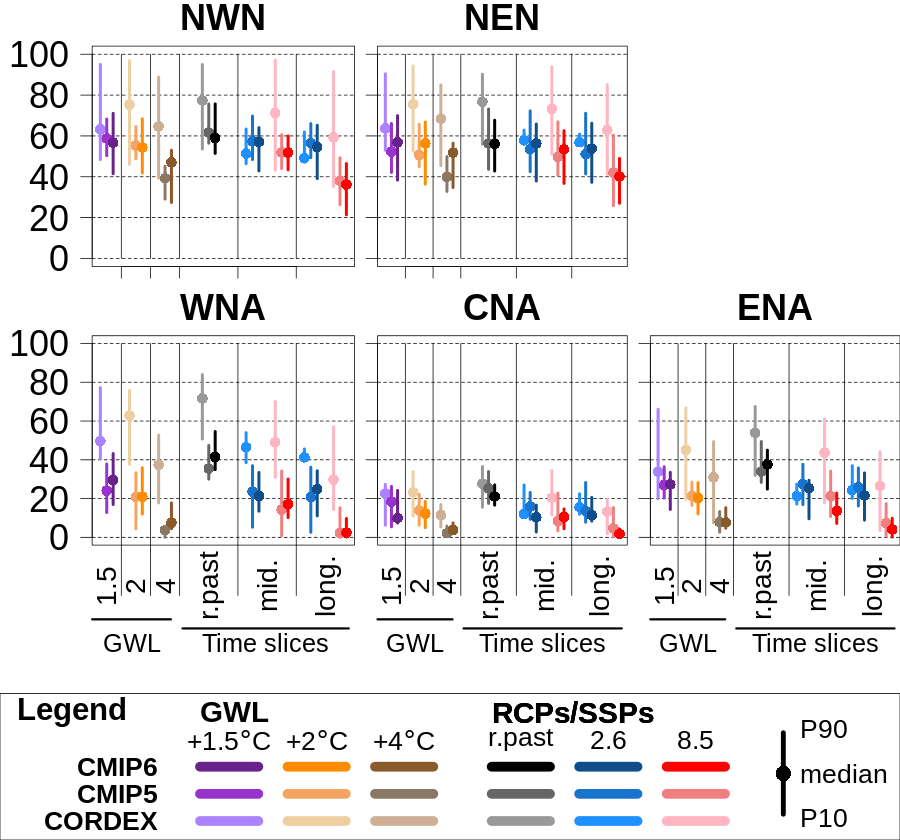

In [34]:
library("IRdisplay")
display_png(file=figname) 